In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
train=pd.read_excel("C://Users//Tanusha//Downloads//data sets//flight ticket//Flight_Ticket_Participant_Datasets//Data_Train.xlsx")

In [3]:
test=pd.read_excel("C://Users//Tanusha//Downloads//data sets//flight ticket//Flight_Ticket_Participant_Datasets//Test_set.xlsx")

In [4]:
train.shape

(10683, 11)

In [5]:
test.shape

(2671, 10)

In [6]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train[train.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [16]:
train[train.Airline=="Air India"].Route.value_counts()

BLR → DEL                            158
DEL → BOM → COK                      117
BOM → HYD                             98
DEL → MAA → COK                       77
DEL → COK                             75
DEL → BLR → COK                       73
DEL → AMD → BOM → COK                 64
CCU → BLR                             61
DEL → GOI → BOM → COK                 58
DEL → HYD → BOM → COK                 56
CCU → DEL → BLR                       50
DEL → HYD → MAA → COK                 47
DEL → CCU → BOM → COK                 43
CCU → BBI → BOM → BLR                 42
CCU → GAU → DEL → BLR                 39
CCU → BOM → BLR                       39
CCU → IXR → DEL → BLR                 37
CCU → DEL → COK → BLR                 36
DEL → JAI → BOM → COK                 33
CCU → BOM → COK → BLR                 30
MAA → CCU                             25
DEL → BHO → BOM → COK                 21
CCU → DEL → AMD → BLR                 21
CCU → HYD → BLR                       19
DEL → RPR → NAG 

In [17]:
train.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [18]:
train.Route.fillna("DEL → BOM → COK",inplace=True)

In [19]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
train.Total_Stops.fillna("1 stop",inplace=True)

In [21]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [22]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


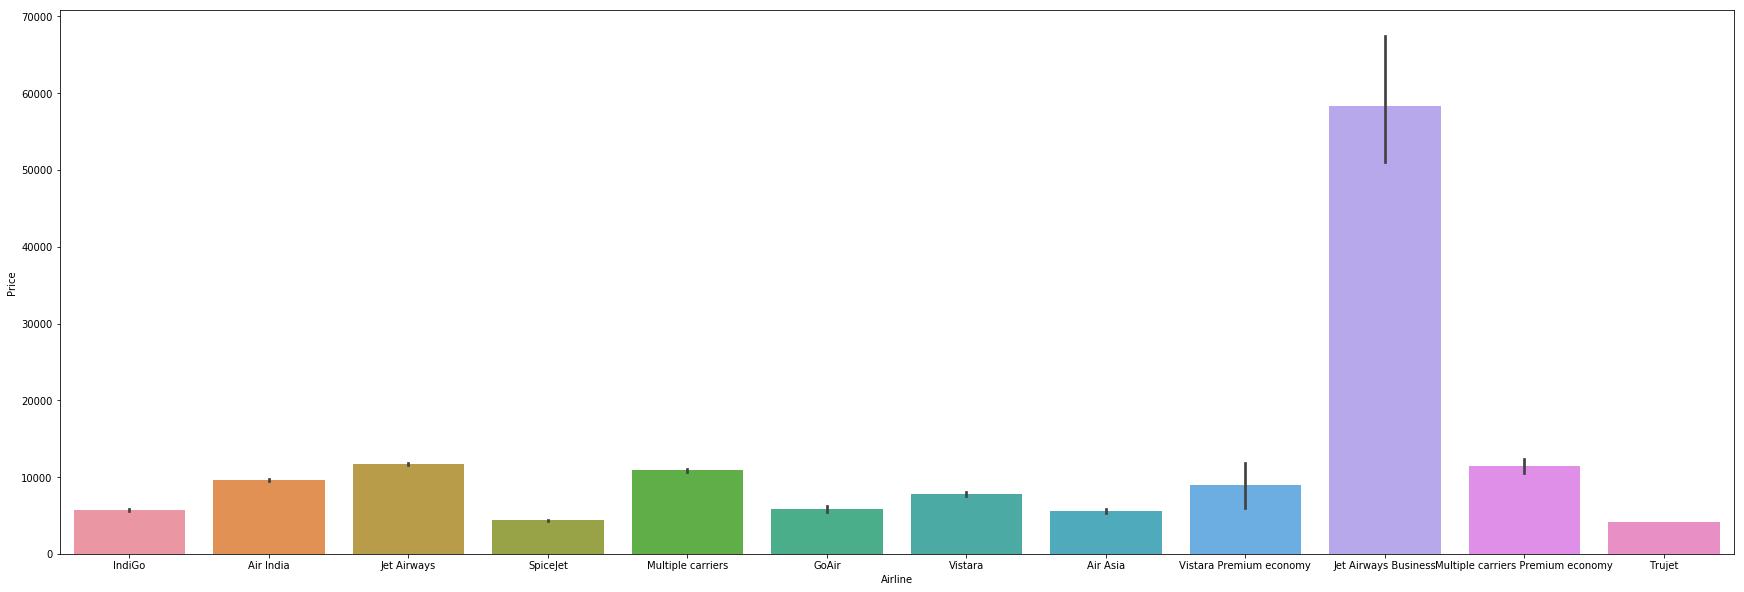

In [33]:
plt.figure(figsize=[30,10])
sns.barplot(x=train.Airline,y=train.Price)

## among all airlines jet airways buisness is charging the maximum price 

In [31]:
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
train[train.Airline=='Go Air'].Total_Stops.value_counts()


Series([], Name: Total_Stops, dtype: int64)

## majority of indigo flights are either non stop or 1 stop

In [61]:
train[train.Airline=='Vistara'].Price.describe()

count      479.000000
mean      7796.348643
std       2914.298578
min       3687.000000
25%       5403.000000
50%       7980.000000
75%       9345.000000
max      21730.000000
Name: Price, dtype: float64

## mediaN price for indigo airline is 5000

C:\Users\Simran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


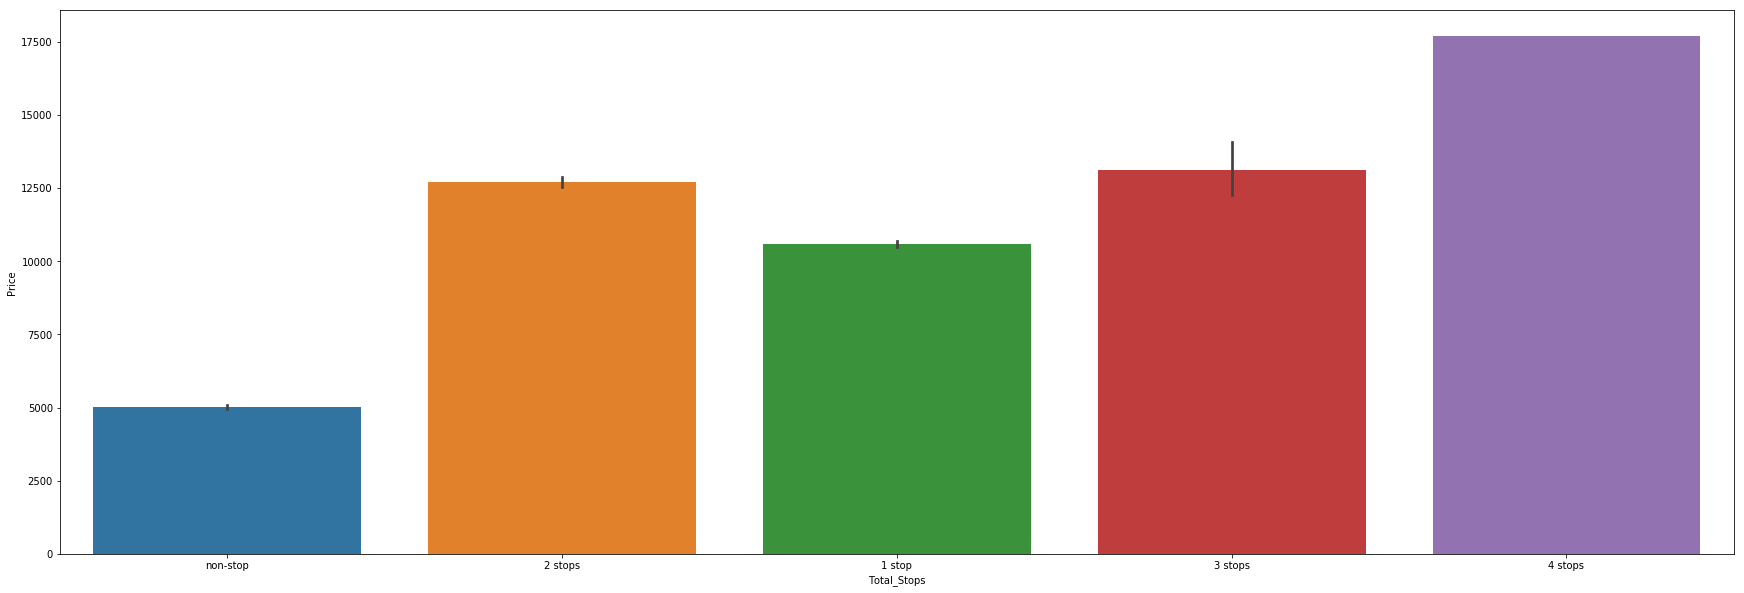

In [46]:
plt.figure(figsize=[30,10])
sns.barplot(x=train.Total_Stops,y=train.Price)

## price for ticket having 4 stops is highest and lowest for airlines with non stop 

In [48]:
train.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## for majority of airline source  point is delhi 

In [50]:
train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
5h 15m      62
11h         62
11h 45m     62
          ... 
29h 40m      1
42h 45m      1
47h 40m      1
3h 25m       1
31h 30m      1
35h 35m      1
31h 50m      1
5m           1
35h 20m      1
30h 10m      1
27h 55m      1
41h 20m      1
33h 45m      1
27h 30m      1
47h          1
19h 50m      1
29h 30m      1
13h 35m      1
29h 10m      1
37h 10m      1
36h 25m      1
30h 15m      1
30h 25m      1
32h 55m      1
28h 30m      1
33h 20m      1
42h 5m       1
40h 20m      1
4h 10m       1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [51]:
train.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

C:\Users\Simran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


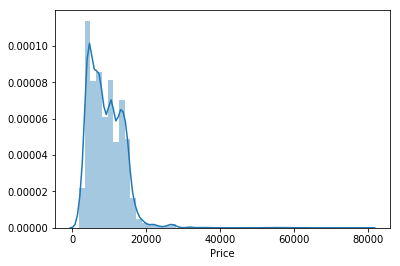

In [53]:
sns.distplot(train.Price)

## data is higly skewed 

In [55]:
train.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## indigo,spicejet,goair,airasia,vistara,trujet median price is below the median price for all airline 

In [62]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [121]:
newtrain=train.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration","Additional_Info"],axis=1)


In [122]:
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [123]:
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [124]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [125]:
newtest=test.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration","Additional_Info"],axis=1)


In [126]:
ohe_train=pd.get_dummies(newtrain)

In [127]:
ohe_test=pd.get_dummies(newtest)

In [128]:
ohe_train.shape

(10683, 29)

In [129]:
ohe_test.shape

(2671, 27)

In [130]:
ohe_train.head()

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7662,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13882,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13302,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [141]:
scaledtrain=pd.DataFrame(sc.fit_transform(ohe_train),columns=ohe_train.columns)

C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [157]:
scaledtest=pd.DataFrame(sc.fit_transform(ohe_test),columns=ohe_test.columns)

C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [143]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
x=scaledtrain.drop("Price",axis=1)
y=scaledtrain.Price

In [144]:
model=lg.fit(x,y)

In [145]:
prediction=lg.predict(scaledtest)

In [139]:
ohe_train.drop("Airline_Trujet",axis=1,inplace=True)

In [84]:
ohe_test.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops',
       'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info'],
      dtype='object')

In [85]:
test.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [104]:
newtrain

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,8625


In [135]:
scaledtrain

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,-1.125548,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,3.234571,-1.054759,-0.407289,-0.065039,-0.009676,1.435324
1,-0.309048,-0.175441,2.257787,-0.135998,-0.487741,-0.750475,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,-0.309160,-1.054759,2.455258,-0.065039,-0.009676,-0.696707
2,1.039858,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.355060,-0.034905,-0.287957,...,1.163890,-0.366493,-0.264193,-0.192310,-0.309160,-1.054759,2.455258,-0.065039,-0.009676,-0.696707
3,-0.622202,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,-0.309160,0.948084,-0.407289,-0.065039,-0.009676,-0.696707
4,0.914076,-0.175441,-0.442912,-0.135998,2.050269,-0.750475,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,3.234571,0.948084,-0.407289,-0.065039,-0.009676,-0.696707
5,-1.130753,-0.175441,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,-0.355060,-0.034905,3.472737,...,-0.859188,-0.366493,-0.264193,-0.192310,-0.309160,-1.054759,-0.407289,-0.065039,-0.009676,1.435324
6,0.433718,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,3.234571,0.948084,-0.407289,-0.065039,-0.009676,-0.696707
7,2.858930,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,3.234571,0.948084,-0.407289,-0.065039,-0.009676,-0.696707
8,0.433718,-0.175441,-0.442912,-0.135998,-0.487741,1.332489,-0.023706,-0.355060,-0.034905,-0.287957,...,-0.859188,-0.366493,-0.264193,-0.192310,3.234571,0.948084,-0.407289,-0.065039,-0.009676,-0.696707
9,-0.100206,-0.175441,-0.442912,-0.135998,-0.487741,-0.750475,-0.023706,2.816429,-0.034905,-0.287957,...,1.163890,-0.366493,-0.264193,-0.192310,-0.309160,0.948084,-0.407289,-0.065039,-0.009676,-0.696707


In [159]:
prediction.shape

(2671,)

In [177]:
price=sc.inverse_transform(sale)

ValueError: non-broadcastable output operand with shape (2671,1) doesn't match the broadcast shape (2671,27)

In [176]:
sale=prediction.reshape(2671,1)


In [183]:
sale=pd.DataFrame(prediction)

In [193]:
sc.fit_transform(a)
price=sc.inverse_transform(sale)

C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [190]:
a=np.array(train.Price).reshape(-1,1)

In [195]:
price=sc.inverse_transform(prediction)

In [196]:
price

array([-1.35032304e+14, -3.10658299e+13, -1.35032304e+14, ...,
       -1.35032304e+14, -1.35032304e+14, -1.35032304e+14])

In [197]:
prediction

array([-2.92839094e+10, -6.73712086e+09, -2.92839094e+10, ...,
       -2.92839094e+10, -2.92839094e+10, -2.92839094e+10])

In [198]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [199]:
model=rf.fit(x,y)
prediction=rf.predict(scaledtest)

C:\Users\Simran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [200]:
prediction

array([ 0.70031714, -0.72838091,  0.70031714, ...,  0.70031714,
       -0.0278498 ,  0.34059202])

In [201]:
price=sc.inverse_transform(prediction)

In [202]:
price

array([12316.32682902,  5728.39536146, 12316.32682902, ...,
       12316.32682902,  8958.64468359, 10657.58272902])

In [203]:
solution = pd.DataFrame({"Price":price})

In [208]:
solution.to_excel("rfflight.xlsx",index=False)

In [206]:
cd

C:\Users\Simran
